# <center><h3>Complex Network Project</h3></center>

In [58]:
import networkx as nx
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.patches as mpatch
plt.style.use("ggplot")

# Pre-Processing

In [59]:
Base_Graph = nx.DiGraph()

department_labels = 'email-Eu-core-department-labels.txt'
email = 'email-Eu-core.txt'

department_labels_csv = pd.read_csv(department_labels, sep=',')
email_csv = pd.read_csv(email, sep=',')

email_csv.head()

,u,v
0,0,1
1,2,3
2,2,4
3,5,6
4,5,7


In [60]:
department_labels_csv.head()

,id,dep
0,0,1
1,1,1
2,2,21
3,3,21
4,4,21


In [61]:
dep_people = {}
# generate dictionary from department labels with keys as department and values as ids
for i in range(len(department_labels_csv)):
    if department_labels_csv['dep'][i] not in dep_people:
        dep_people[department_labels_csv['dep'][i]] = [department_labels_csv['id'][i]]
    else:
        dep_people[department_labels_csv['dep'][i]].append(department_labels_csv['id'][i])
    # print(department_labels_csv['department'][i])
print(dep_people)

{1: [0, 1, 17, 18, 73, 74, 85, 120, 177, 215, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 248, 297, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 341, 414, 415, 449, 459, 468, 479, 516, 517, 603, 605, 629, 645, 650, 675, 696, 697, 731, 734, 743, 764, 775, 797, 798, 846, 852, 872, 904, 905, 916, 1002], 21: [2, 3, 4, 56, 57, 58, 59, 63, 137, 138, 192, 193, 194, 195, 281, 286, 305, 408, 412, 456, 520, 532, 571, 586, 587, 606, 622, 625, 633, 634, 635, 636, 648, 670, 685, 691, 711, 718, 755, 762, 774, 803, 815, 826, 832, 845, 849, 863, 865, 880, 882, 884, 899, 901, 921, 928, 982, 990, 993, 994, 1001], 25: [5, 6, 64, 489, 528, 644], 14: [7, 8, 9, 11, 12, 19, 43, 44, 141, 161, 213, 246, 247, 249, 264, 265, 266, 267, 293, 324, 332, 358, 359, 360, 362, 365, 374, 406, 407, 421, 430, 441, 451, 452, 466, 487, 488, 496, 498, 499, 500, 501, 502, 503, 504, 505, 506, 510, 525, 529, 530, 555, 558, 565, 566, 569, 570, 573, 602, 608, 649, 658, 661, 666, 672, 674, 699, 700, 707, 720, 7

In [62]:
i = 0
dep_color = []
for name in mcolors.CSS4_COLORS:
    i+=1
    if(i == 43):
        break
    dep_color.append(name)

color_map = []
for i in range(len(department_labels_csv)):
    color_map.append(dep_color[department_labels_csv['dep'][i]])

print((len(color_map)))
print(color_map[0])


1005
antiquewhite


In [63]:
# Base_Graph.add_nodes_from()
Base_Graph.add_edges_from(email_csv.to_numpy())

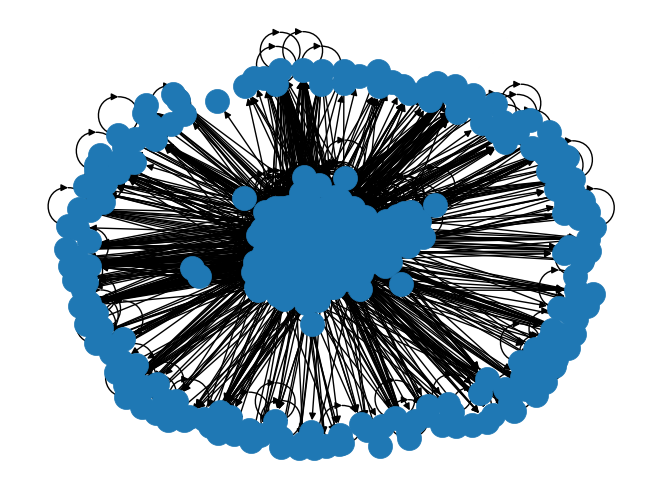

In [64]:
# nx.draw(Base_Graph, node_color=color_map)
nx.draw(Base_Graph, pos=nx.spring_layout(Base_Graph))
# nx.draw(Base_Graph, pos=nx.kamada_kawai_layout(Base_Graph))
plt.show()

In [65]:
Subsest_Base_Graph = nx.DiGraph()

email_short = 'email-Eu-core.txt'

email_short_csv = pd.read_csv(email_short, sep=',')

email_short_csv.head()

# Base_Graph.add_nodes_from()
# Subsest_Base_Graph.add_edges_from(email_short_csv.to_numpy())
# nx.draw(Subsest_Base_Graph, node_color=color_map)
# plt.show()

,u,v
0,0,1
1,2,3
2,2,4
3,5,6
4,5,7


In [66]:
undirected_Base_Graph = nx.Graph()

undirected_Base_Graph.add_edges_from(email_csv.to_numpy())
undirected_Base_Graph.remove_edges_from(nx.selfloop_edges(undirected_Base_Graph))
undirected_Base_Graph.remove_nodes_from(list(nx.isolates(undirected_Base_Graph)))
# nx.draw(undirected_Base_Graph)
# plt.show()

# Degree Distribution

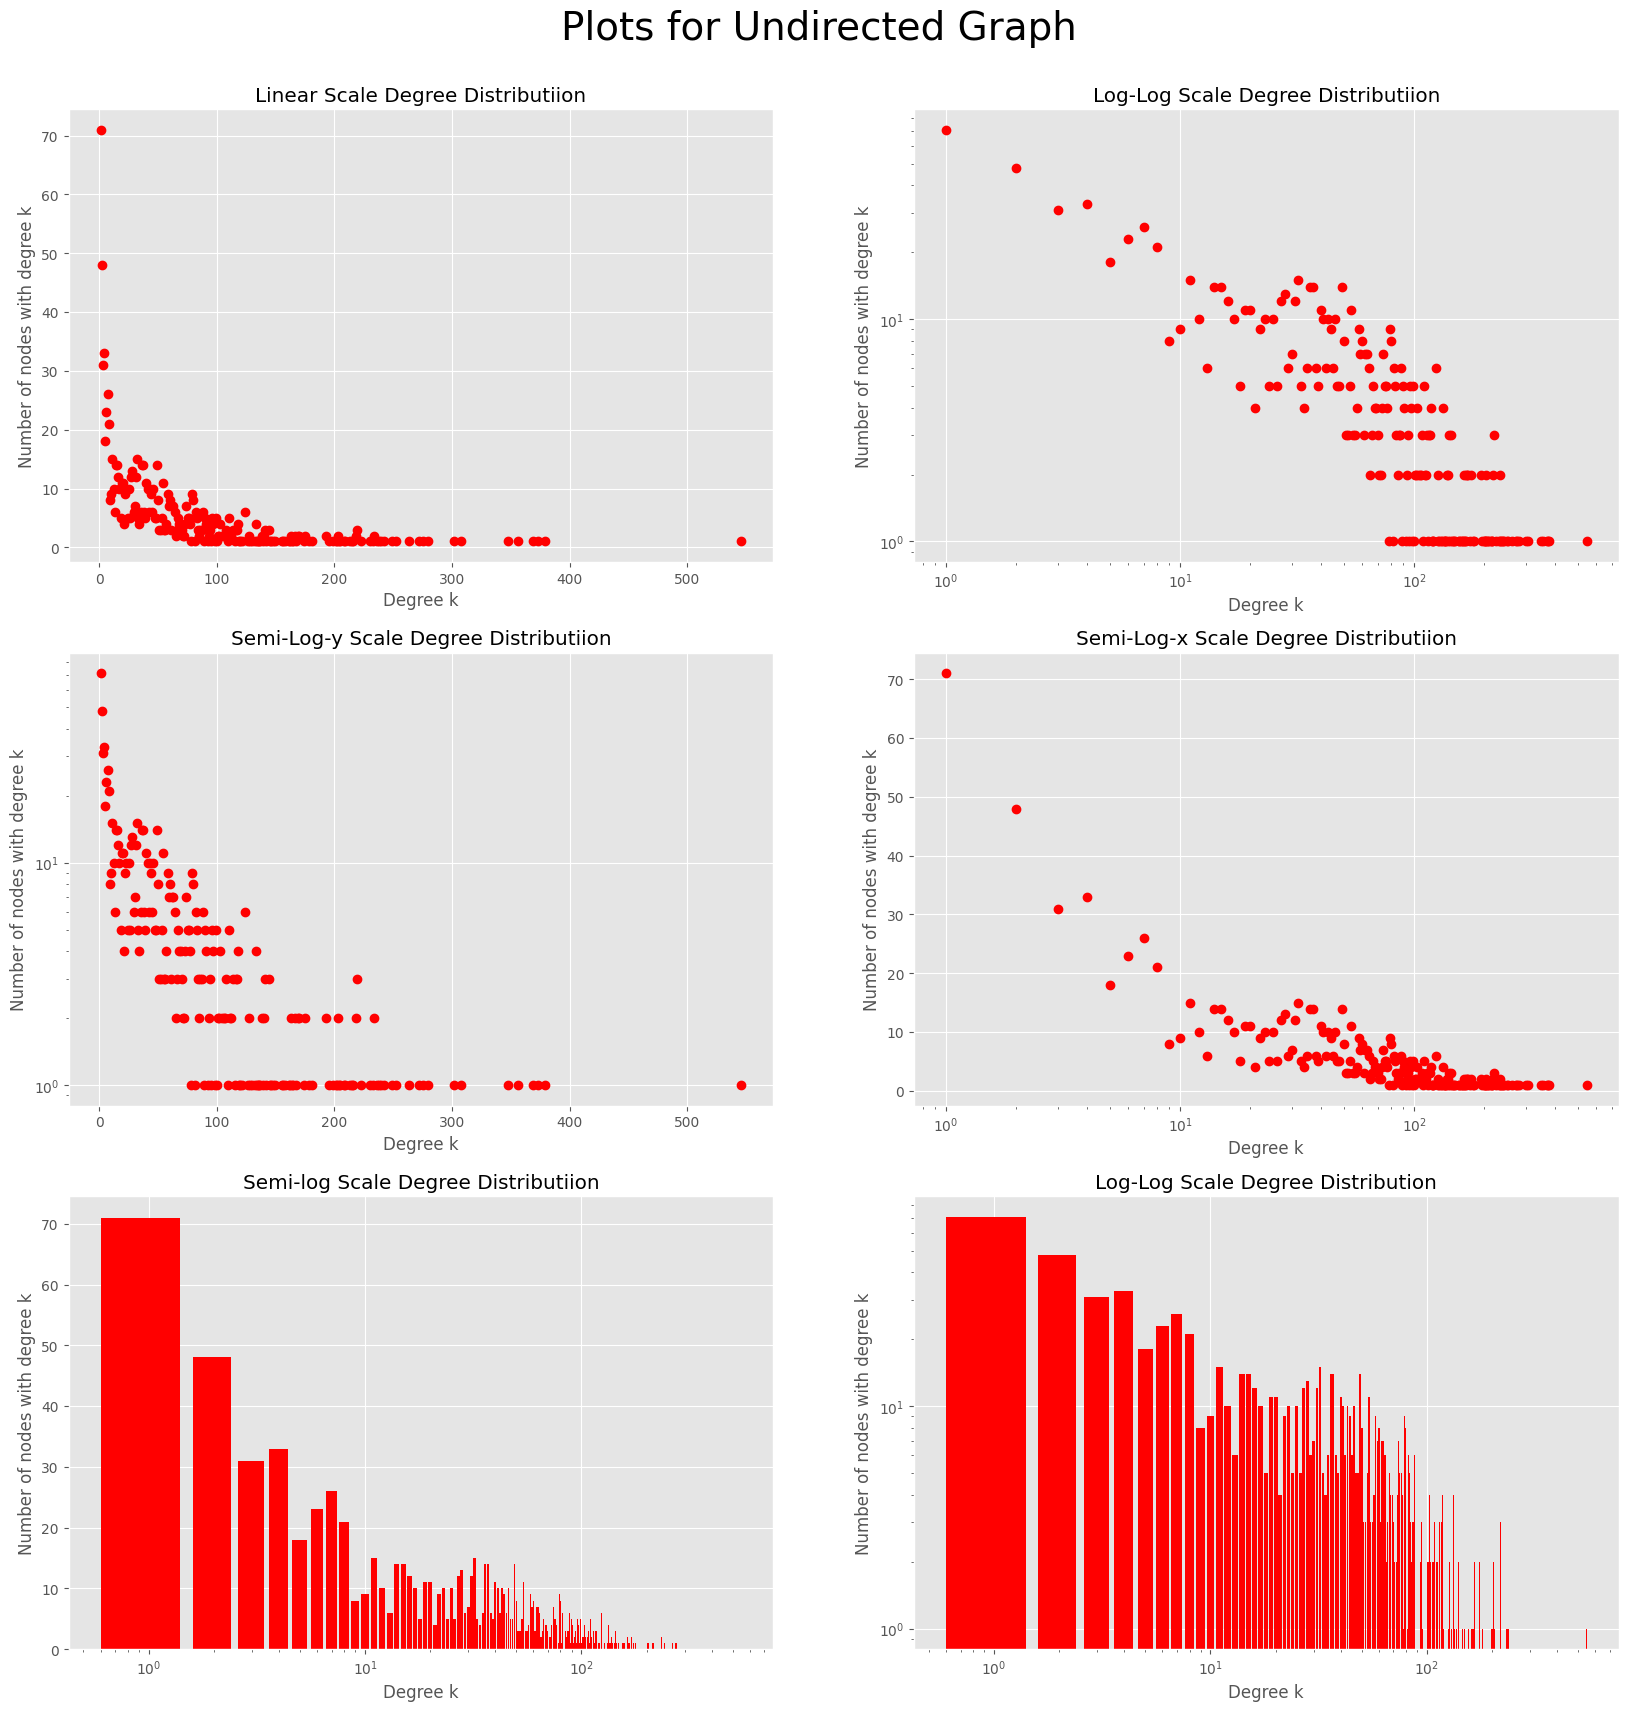

In [67]:
degree = np.array(Base_Graph.degree)[:,1]
unique_elements, counts_elements = np.unique(degree, return_counts=True)


fig, ax = plt.subplots(3, 2, figsize=(20, 20))
fig.suptitle("Plots for Undirected Graph", y=0.93, fontsize=28)
ax[0, 0].plot(unique_elements, counts_elements, 'ro')
ax[0, 0].set_title("Linear Scale Degree Distributiion")
ax[0, 0].set_xlabel("Degree k")
ax[0, 0].set_ylabel("Number of nodes with degree k")


ax[0, 1].loglog(unique_elements, counts_elements, 'ro')
ax[0, 1].set_title("Log-Log Scale Degree Distributiion")
ax[0, 1].set_xlabel("Degree k")
ax[0, 1].set_ylabel("Number of nodes with degree k")

ax[1, 0].semilogy(unique_elements, counts_elements, 'ro')
ax[1, 0].set_title("Semi-Log-y Scale Degree Distributiion")
ax[1, 0].set_xlabel("Degree k")
ax[1, 0].set_ylabel("Number of nodes with degree k")


ax[1, 1].semilogx(unique_elements, counts_elements, 'ro')
ax[1, 1].set_title("Semi-Log-x Scale Degree Distributiion")
ax[1, 1].set_xlabel("Degree k")
ax[1, 1].set_ylabel("Number of nodes with degree k")

ax[2, 0].bar(unique_elements, counts_elements, color='r')
ax[2, 0].set_xscale('log')
ax[2, 0].set_title("Semi-log Scale Degree Distributiion")
ax[2, 0].set_xlabel("Degree k")
ax[2, 0].set_ylabel("Number of nodes with degree k")

ax[2, 1].bar(unique_elements, counts_elements, color='r', log=True)
ax[2, 1].set_xscale('log')
ax[2, 1].set_title("Log-Log Scale Degree Distribution")
ax[2, 1].set_xlabel("Degree k")
ax[2, 1].set_ylabel("Number of nodes with degree k")
plt.show()


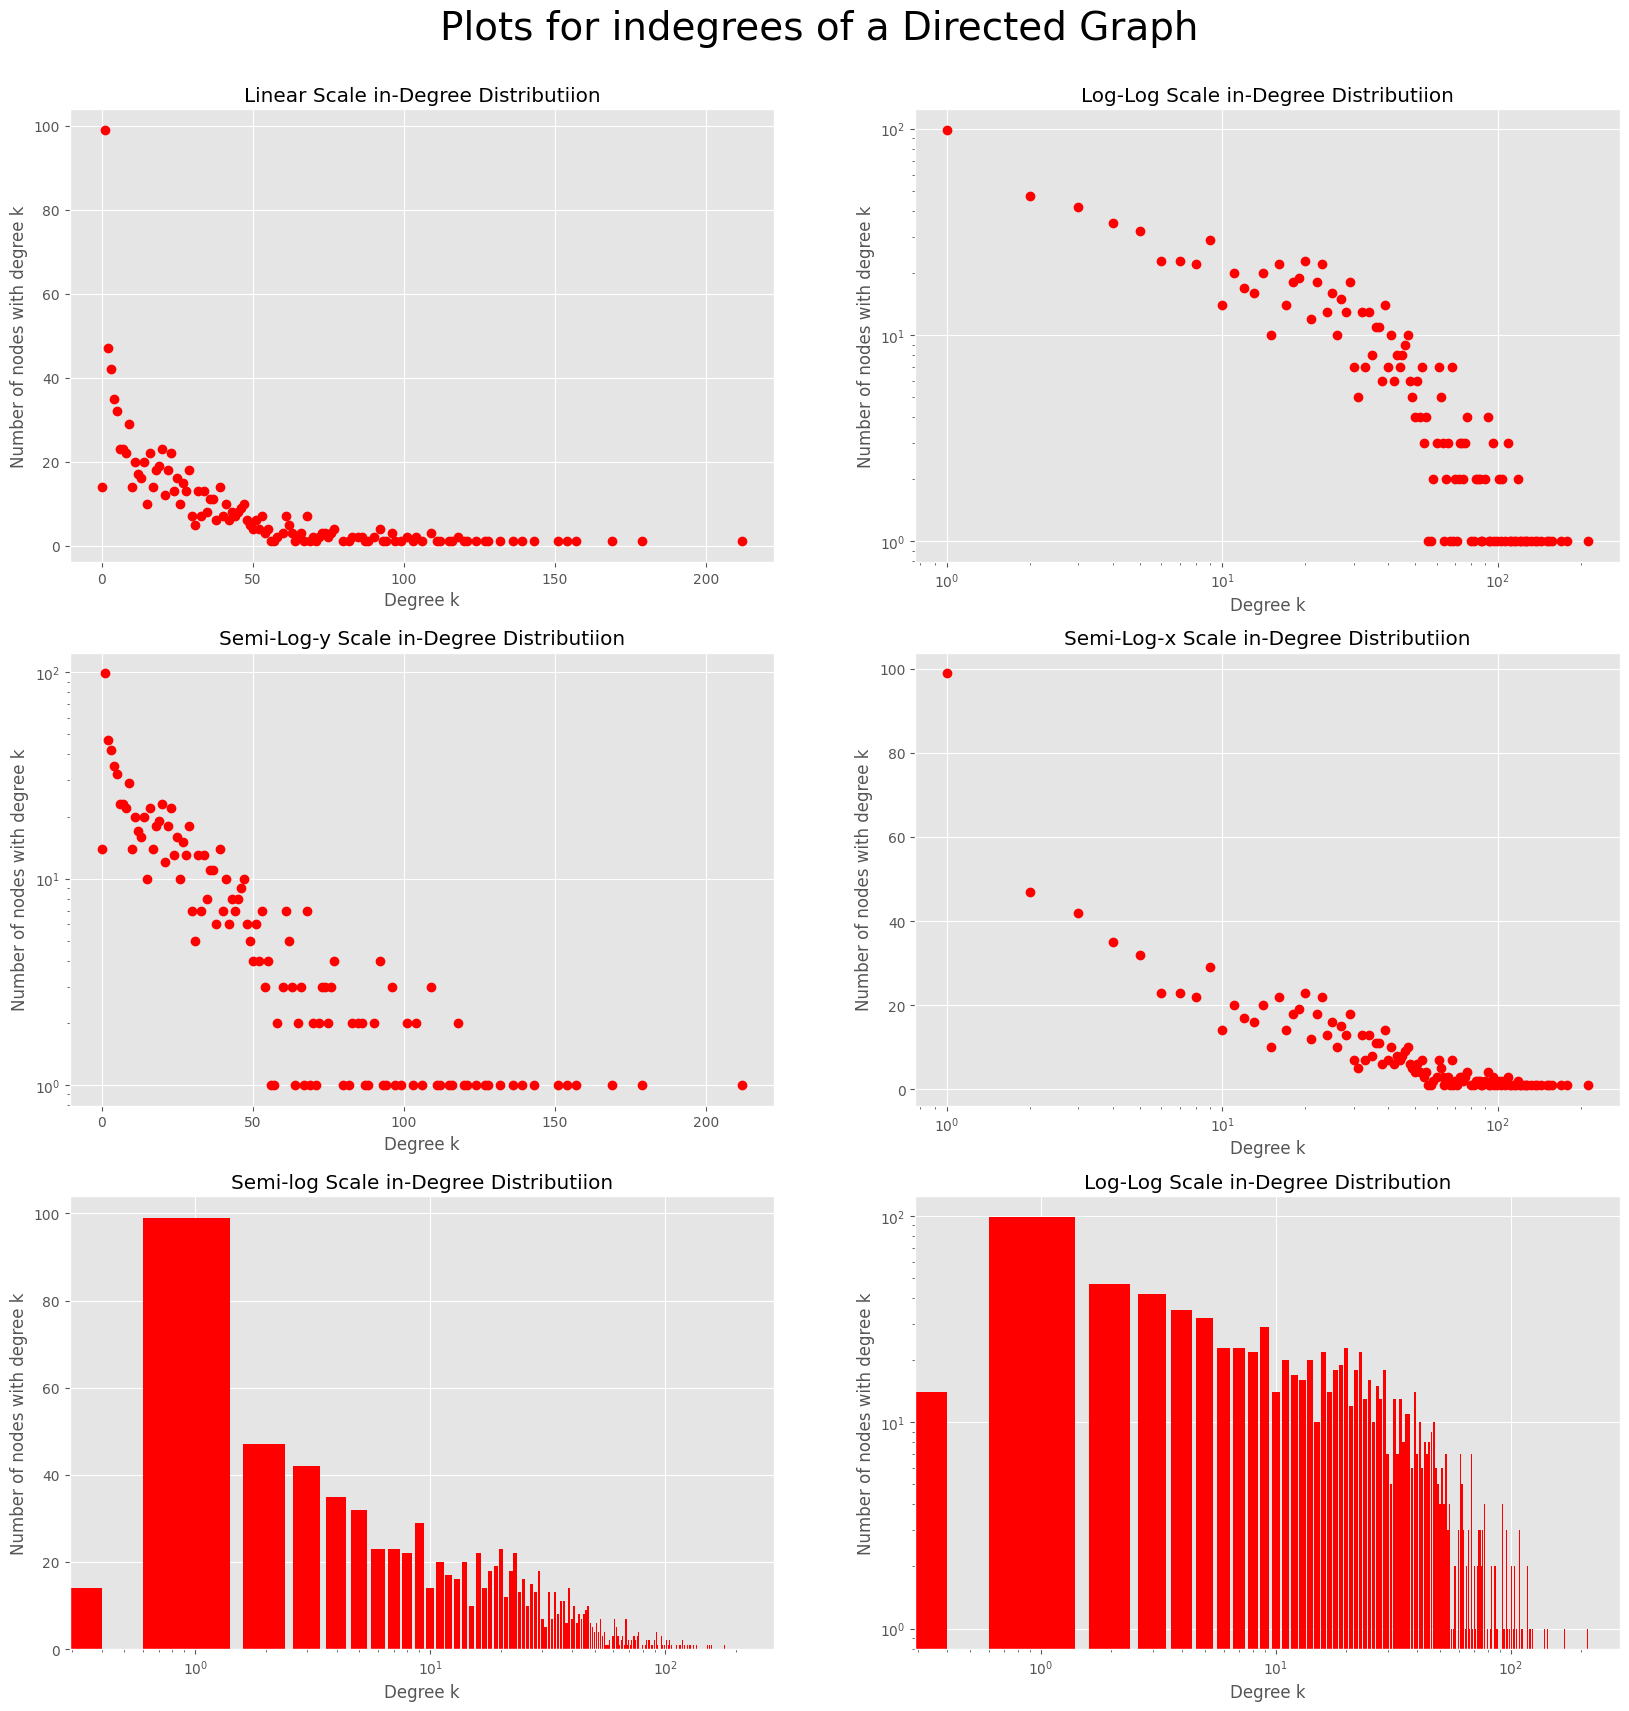

In [68]:
degree = np.array(Base_Graph.in_degree)[:,1]
unique_elements, counts_elements = np.unique(degree, return_counts=True)
fig, ax = plt.subplots(3, 2, figsize=(20, 20))
fig.suptitle("Plots for indegrees of a Directed Graph", y=0.93, fontsize=28)
ax[0, 0].plot(unique_elements, counts_elements, 'ro')
ax[0, 0].set_title("Linear Scale in-Degree Distributiion")
ax[0, 0].set_xlabel("Degree k")
ax[0, 0].set_ylabel("Number of nodes with degree k")


ax[0, 1].loglog(unique_elements, counts_elements, 'ro')
ax[0, 1].set_title("Log-Log Scale in-Degree Distributiion")
ax[0, 1].set_xlabel("Degree k")
ax[0, 1].set_ylabel("Number of nodes with degree k")

ax[1, 0].semilogy(unique_elements, counts_elements, 'ro')
ax[1, 0].set_title("Semi-Log-y Scale in-Degree Distributiion")
ax[1, 0].set_xlabel("Degree k")
ax[1, 0].set_ylabel("Number of nodes with degree k")


ax[1, 1].semilogx(unique_elements, counts_elements, 'ro')
ax[1, 1].set_title("Semi-Log-x Scale in-Degree Distributiion")
ax[1, 1].set_xlabel("Degree k")
ax[1, 1].set_ylabel("Number of nodes with degree k")

ax[2, 0].bar(unique_elements, counts_elements, color='r')
ax[2, 0].set_xscale('log')
ax[2, 0].set_title("Semi-log Scale in-Degree Distributiion")
ax[2, 0].set_xlabel("Degree k")
ax[2, 0].set_ylabel("Number of nodes with degree k")

ax[2, 1].bar(unique_elements, counts_elements, color='r', log=True)
ax[2, 1].set_xscale('log')
ax[2, 1].set_title("Log-Log Scale in-Degree Distribution")
ax[2, 1].set_xlabel("Degree k")
ax[2, 1].set_ylabel("Number of nodes with degree k")
plt.show()

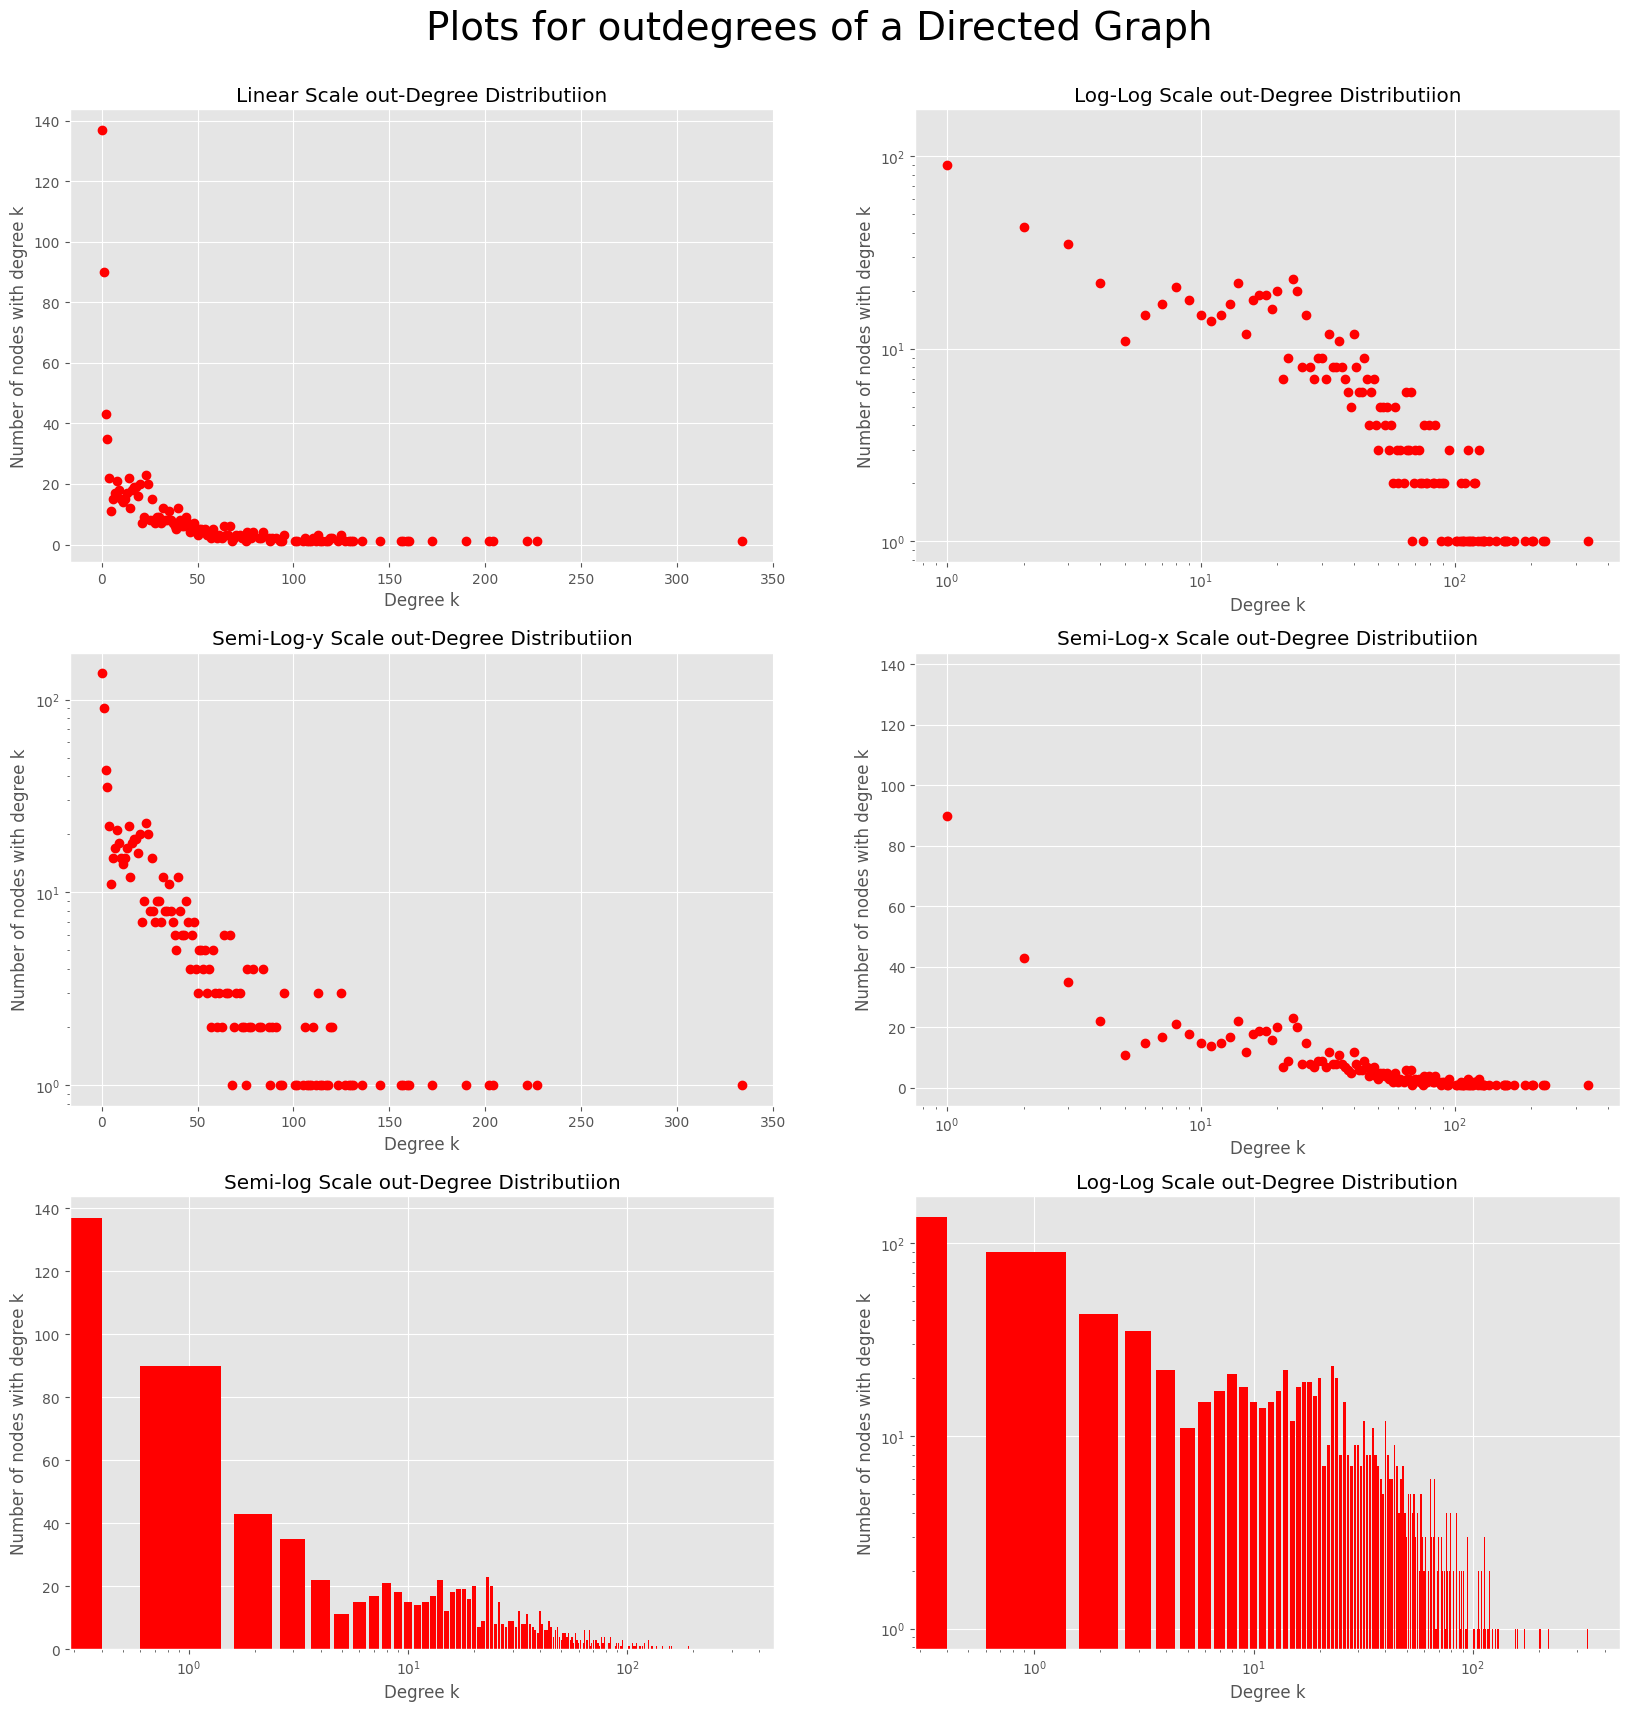

In [69]:
degree = np.array(Base_Graph.out_degree)[:,1]
unique_elements, counts_elements = np.unique(degree, return_counts=True)

fig, ax = plt.subplots(3, 2, figsize=(20, 20))
fig.suptitle("Plots for outdegrees of a Directed Graph", y=0.93, fontsize=28)
ax[0, 0].plot(unique_elements, counts_elements, 'ro')
ax[0, 0].set_title("Linear Scale out-Degree Distributiion")
ax[0, 0].set_xlabel("Degree k")
ax[0, 0].set_ylabel("Number of nodes with degree k")


ax[0, 1].loglog(unique_elements, counts_elements, 'ro')
ax[0, 1].set_title("Log-Log Scale out-Degree Distributiion")
ax[0, 1].set_xlabel("Degree k")
ax[0, 1].set_ylabel("Number of nodes with degree k")

ax[1, 0].semilogy(unique_elements, counts_elements, 'ro')
ax[1, 0].set_title("Semi-Log-y Scale out-Degree Distributiion")
ax[1, 0].set_xlabel("Degree k")
ax[1, 0].set_ylabel("Number of nodes with degree k")

ax[1, 1].semilogx(unique_elements, counts_elements, 'ro')
ax[1, 1].set_title("Semi-Log-x Scale out-Degree Distributiion")
ax[1, 1].set_xlabel("Degree k")
ax[1, 1].set_ylabel("Number of nodes with degree k")

ax[2, 0].bar(unique_elements, counts_elements, color='r')
ax[2, 0].set_xscale('log')
ax[2, 0].set_title("Semi-log Scale out-Degree Distributiion")
ax[2, 0].set_xlabel("Degree k")
ax[2, 0].set_ylabel("Number of nodes with degree k")

ax[2, 1].bar(unique_elements, counts_elements, color='r', log=True)
ax[2, 1].set_xscale('log')
ax[2, 1].set_title("Log-Log Scale out-Degree Distribution")
ax[2, 1].set_xlabel("Degree k")
ax[2, 1].set_ylabel("Number of nodes with degree k")
plt.show()

# Louvain Algorithn

In [70]:
import networkx as nx
louvian_G = Base_Graph.copy()
louvian_G.remove_edges_from(nx.selfloop_edges(louvian_G))
# louvian_G.remove_nodes_from(list(nx.isolates(louvian_G)))
# nx.draw(louvian_G, with_labels=True, font_weight='bold')

In [71]:
def louvain_self(oldgraph, num_iter, threshold=1e-7, all_res = np.array([0, 0.01, 0.05, 0.5])):
    num_comm = 0
    all_communities = []
    for i in range(0, num_iter):
        G1 = oldgraph.copy()
        res = all_res[np.random.randint(0, len(all_res))]
        louvian_communites = np.array(nx.community.louvain_communities(G1, resolution=res, threshold=threshold, seed = i))
        num_comm += louvian_communites.shape[0]
        all_communities.append(louvian_communites)
    avg_communities = num_comm/num_iter
    
    return avg_communities, all_communities

In [72]:
# louvian_G_avg_comm, louvian_G_all_comm = louvain_self(louvian_G, 100, threshold=1e-15, all_res = np.array([0, 0.01, 0.05, 0.5]))
louvian_G_avg_comm, louvian_G_all_comm = louvain_self(louvian_G, 1000, threshold=1e-2, all_res = np.array([0.13, 0.15, 0.17])*8)
print(louvian_G_avg_comm)

40.123


In [73]:
louvain_community_size = np.array([])
for i in range(len(louvian_G_all_comm)):
    louvain_community_size = np.append(louvain_community_size, len(louvian_G_all_comm[i]))

print(sorted(louvain_community_size))
# print(np.where(louvain_community_size == 40)[0])
# print(np.where(louvain_community_size == 41)[0])
print(np.where(louvain_community_size == 42)[0])
# print(np.where(louvain_community_size == 43)[0])
# print(np.where(louvain_community_size == 44)[0])

[34.0, 34.0, 34.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.

In [74]:
louvain_index = np.where(louvain_community_size == 42)[0][0]
louvian_G_all_comm[louvain_index] = sorted(louvian_G_all_comm[louvain_index])
print(len(louvian_G_all_comm[louvain_index]))
for i in range(len(louvian_G_all_comm[louvain_index])):
    print(louvian_G_all_comm[louvain_index][i])
    # print("")

42
{261, 13, 785, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 545, 36, 37, 35, 39, 40, 38, 816, 842, 75, 588, 590, 336, 337, 338, 339, 860, 96, 609, 875, 878, 367, 881, 115, 883, 116, 119, 123, 900, 135, 136, 655, 914, 915, 151, 409, 165, 169, 170, 427, 436, 437, 438, 439, 953, 964, 721, 722, 978, 980, 470, 986, 987, 988, 229, 997, 494, 753, 757, 251}
{160, 512, 882, 724, 821, 730, 591}
{2, 3, 516, 5, 6, 517, 4, 520, 774, 271, 528, 784, 532, 281, 285, 286, 803, 806, 807, 552, 809, 812, 302, 815, 304, 305, 561, 303, 564, 54, 55, 56, 57, 58, 59, 826, 571, 63, 832, 586, 587, 845, 849, 854, 599, 88, 89, 859, 604, 863, 864, 865, 610, 102, 619, 876, 880, 369, 625, 884, 373, 886, 630, 888, 634, 635, 636, 126, 131, 132, 901, 902, 899, 646, 137, 138, 644, 408, 665, 921, 411, 412, 924, 928, 683, 685, 174, 175, 949, 698, 701, 192, 193, 194, 195, 716, 462, 718, 208, 463, 211, 982, 990, 991, 481, 994, 738, 993, 737, 743, 1001, 489, 1004, 750, 755, 762, 763, 252}
{420, 810, 651, 301, 624, 596, 5

In [75]:
louvain_index = np.where(louvain_community_size == 42)[0][-1]
louvian_G_all_comm[louvain_index] = sorted(louvian_G_all_comm[louvain_index])
print(len(louvian_G_all_comm[louvain_index]))
for i in range(len(louvian_G_all_comm[louvain_index])):
    print(louvian_G_all_comm[louvain_index][i])
    # print("")

42
{261, 263, 13, 527, 785, 23, 24, 25, 26, 795, 27, 29, 30, 31, 32, 33, 34, 547, 545, 35, 37, 38, 40, 36, 39, 47, 48, 816, 318, 75, 76, 333, 590, 847, 588, 337, 338, 339, 336, 860, 96, 609, 361, 875, 878, 367, 113, 114, 115, 116, 370, 881, 119, 883, 123, 895, 897, 900, 135, 136, 28, 655, 914, 915, 151, 919, 409, 925, 417, 165, 423, 169, 170, 171, 427, 436, 437, 438, 439, 953, 442, 443, 444, 964, 455, 976, 721, 722, 978, 980, 725, 981, 983, 470, 986, 987, 736, 485, 229, 997, 494, 753, 245, 757, 251, 767}
{420, 810, 651, 301, 624, 596, 597, 118, 117, 279, 669}
{0, 1, 775, 519, 905, 650, 268, 17, 18, 146, 788, 537, 297, 560, 177, 307, 309, 310, 311, 696, 312, 313, 314, 316, 317, 695, 315, 73, 74, 330, 459, 331, 717, 120, 979, 341, 85, 215, 726, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 734, 872, 745, 1002, 366, 756, 629, 758, 248, 764}
{384, 385, 386, 387, 388, 389, 390, 391, 392, 904, 394, 393, 396, 397, 398, 395, 782, 659, 150, 668, 157, 295, 296, 680, 943, 179, 308, 181, 

In [76]:
actual_com_List = []
for key, value in dep_people.items():
    print(value)
    actual_com_List.append(value)

[0, 1, 17, 18, 73, 74, 85, 120, 177, 215, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 248, 297, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 341, 414, 415, 449, 459, 468, 479, 516, 517, 603, 605, 629, 645, 650, 675, 696, 697, 731, 734, 743, 764, 775, 797, 798, 846, 852, 872, 904, 905, 916, 1002]
[2, 3, 4, 56, 57, 58, 59, 63, 137, 138, 192, 193, 194, 195, 281, 286, 305, 408, 412, 456, 520, 532, 571, 586, 587, 606, 622, 625, 633, 634, 635, 636, 648, 670, 685, 691, 711, 718, 755, 762, 774, 803, 815, 826, 832, 845, 849, 863, 865, 880, 882, 884, 899, 901, 921, 928, 982, 990, 993, 994, 1001]
[5, 6, 64, 489, 528, 644]
[7, 8, 9, 11, 12, 19, 43, 44, 141, 161, 213, 246, 247, 249, 264, 265, 266, 267, 293, 324, 332, 358, 359, 360, 362, 365, 374, 406, 407, 421, 430, 441, 451, 452, 466, 487, 488, 496, 498, 499, 500, 501, 502, 503, 504, 505, 506, 510, 525, 529, 530, 555, 558, 565, 566, 569, 570, 573, 602, 608, 649, 658, 661, 666, 672, 674, 699, 700, 707, 720, 729, 739, 754, 765, 

In [77]:
# def con_setToList(set1):
    

# Community Matching based on Similarity

In [78]:
def similarity_score_bet_twoComm(com1, com2, nodes = 1005):
    score = 0.0
    map1 = np.zeros(nodes)
    map2 = np.zeros(nodes)
    for x in com1:
        map1[x] = 1
    for x in com2:
        map2[x] = 1
    
    for i in range(0, 1005):
        if(map1[i] == 1 and map2[i] == 1):
            score += 1.0
    
    return ((score*score)/(len(com1)*len(com2)))

In [79]:
# similarity_score_bet_twoComm(louvian_G_all_comm[louvain_index][0], actual_com_List[0])

In [80]:
def accuracy_of_community_detection(list_com1, list_com2, nodes = 1005, threshold = 0.3):
    new_list1 = []
    new_list2 = list_com2.copy()

    for x in list_com1:
        if(len(x) > int(threshold*nodes/100)):
            new_list1.append(x)
    
    size1 = len(new_list1)

    score = 0.0
    for x in new_list1:
        max_score = 0.0
        max_index = -1
        i = 0
        if(len(new_list2) == 0):
            break
        for y in new_list2:
            s = similarity_score_bet_twoComm(x, y, nodes)
            # print(s)
            if(s > max_score):
                max_score = s
                max_index = i
            i += 1
        del new_list2[max_index]
        score += max_score
        # print(max_score)
    
    return score/size1



In [81]:
louvain_index = np.where(louvain_community_size == 42)[0][-1]
louvian_G_all_comm[louvain_index]
# actual_com_List
print(accuracy_of_community_detection(louvian_G_all_comm[louvain_index], actual_com_List, 1005, 0.3))

0.4825624786630348


In [82]:
max_score = 0.0
best_community = []
for x in louvian_G_all_comm:
    score = accuracy_of_community_detection(x, actual_com_List, 1005, 0.3)
    # print(score)
    if(score > max_score):
        max_score = score
        best_community = x

print("The best score is: "+str(max_score))
print("The size of the best detected community is: "+str(len(best_community)))
print("The best community is :")
print(best_community)

The best score is: 0.6206965125735147
The size of the best detected community is: 39
The best community is :
[{288, 162, 643, 613, 70, 71, 780, 431, 432, 433, 50, 49, 84, 793, 217}
 {7, 8, 265, 266, 267, 12, 11, 9, 525, 264, 529, 530, 19, 533, 804, 293, 805, 43, 44, 555, 558, 565, 566, 823, 569, 570, 827, 573, 830, 833, 324, 778, 332, 856, 602, 608, 358, 359, 360, 616, 362, 374, 893, 649, 141, 912, 913, 661, 406, 407, 666, 922, 672, 161, 674, 421, 430, 950, 951, 441, 699, 700, 957, 956, 707, 452, 451, 967, 971, 973, 975, 720, 466, 213, 729, 503, 996, 487, 488, 496, 498, 499, 500, 754, 246, 247, 504, 505, 506, 501, 502, 765, 510}
 {259, 260, 325, 326, 327, 72, 10, 715, 524, 400, 723, 20, 22, 728, 538, 858, 92, 733, 923, 416, 945, 306, 818, 885, 887, 825, 894, 127}
 {514, 258, 66, 67, 454, 328, 329, 652, 143, 469, 984, 410, 90, 475, 476, 989, 478, 91, 477, 474, 356, 357, 1003, 108, 109, 110, 111, 112, 375, 62, 831}
 {781, 782, 537, 295, 296, 52, 53, 60, 61, 320, 321, 841, 595, 868, 869, 

In [83]:
max_score = 0.0
best_community = []
for x in louvian_G_all_comm:
    if(len(x) == 42):
        score = accuracy_of_community_detection(x, actual_com_List, 1005, 0.3)
        # print(score)
        if(score > max_score):
            max_score = score
            best_community = x

print("The best score is: "+str(max_score))
print("The size of the best detected community is: "+str(len(best_community)))
print("The best community is :")
print(best_community)

The best score is: 0.5941698449865269
The size of the best detected community is: 42
The best community is :
[{288, 162, 643, 612, 70, 71, 780, 431, 432, 433, 50, 49, 84, 217}
 {0, 1, 519, 775, 268, 17, 18, 788, 537, 793, 297, 560, 307, 309, 310, 311, 312, 313, 314, 315, 316, 317, 73, 74, 331, 330, 85, 341, 613, 614, 872, 366, 629, 120, 905, 650, 146, 177, 690, 695, 696, 459, 717, 979, 726, 215, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 734, 745, 1002, 756, 758, 759, 248, 764}
 {897, 263, 527, 916, 919, 795, 925, 414, 417, 547, 423, 171, 47, 48, 442, 443, 444, 318, 449, 455, 76, 333, 847, 976, 725, 981, 983, 603, 479, 736, 485, 361, 113, 370, 114, 245, 895}
 {128, 776, 908, 786, 917, 918, 801, 677, 167, 41, 940, 557, 942, 689, 51, 820, 955, 64, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 974, 207, 593, 850, 970, 94, 95, 740, 749, 751}
 {7, 264, 265, 9, 11, 266, 12, 267, 525, 8, 529, 530, 19, 533, 804, 293, 805, 555, 44, 43, 558, 565, 566, 823, 569, 570, 827, 573